In [217]:
import pandas as pd
import glob 
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import umap
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [218]:
save_dir = ''
file_names = glob.glob(os.path.join(save_dir, f'QCEH_data/TCV_DATAno*.parquet'))

In [219]:
df_list = [pd.read_parquet(x) for x in file_names]
len(df_list)

60

In [220]:
df_list[5]

,shotnumber,time,H98y2calc,TS_Te_87_93,TS_Ne_87_93,TS_Te_93_99,TS_Ne_93_99,isbaffled,ip,b0,...,lpol_io,druxp2,prad,zeff,nu_sol,muzero,kappacap,qcyl,alpha,LHD_label
0,78601.0,0.6500,1.059590,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168229.664052,-1.442158,...,0.903255,0.016870,135896.682298,1.579703,18.280072,0.000001,1.438080,5.027359,143.969039,1.0
1,78601.0,0.6501,1.059590,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168229.975806,-1.442158,...,0.903253,0.016870,135898.025599,1.579681,18.280077,0.000001,1.438089,5.027349,143.966458,1.0
2,78601.0,0.6502,1.059590,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168230.320323,-1.442158,...,0.903251,0.016870,135899.393254,1.579659,18.280082,0.000001,1.438098,5.027338,143.963834,1.0
3,78601.0,0.6503,1.059590,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168230.629951,-1.442158,...,0.903249,0.016870,135900.760909,1.579637,18.280087,0.000001,1.438108,5.027328,143.961270,1.0
4,78601.0,0.6504,1.059590,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168230.893901,-1.442158,...,0.903247,0.016870,135902.128564,1.579615,18.280092,0.000001,1.438117,5.027319,143.958784,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,78601.0,1.7496,0.902429,200.702332,6.559800e+19,151.117920,5.905082e+19,1.0,-168246.613125,-1.442966,...,0.861869,0.010909,665514.700554,1.714135,3.766884,0.000001,1.455791,4.792772,31.986197,2.0
10997,78601.0,1.7497,0.902429,200.702332,6.559800e+19,151.117920,5.905082e+19,1.0,-168246.254952,-1.442941,...,0.861826,0.010909,665365.085710,1.713696,3.766874,0.000001,1.455770,4.792770,31.977971,2.0
10998,78601.0,1.7498,0.902429,200.702332,6.559800e+19,151.117920,5.905082e+19,1.0,-168245.913383,-1.442915,...,0.861782,0.010909,665215.470866,1.713257,3.766863,0.000001,1.455748,4.792768,31.969739,2.0
10999,78601.0,1.7499,0.902429,200.702332,6.559800e+19,151.117920,5.905082e+19,1.0,-168245.655936,-1.442889,...,0.861739,0.010909,665065.856022,1.712817,3.766853,0.000001,1.455727,4.792763,31.961475,2.0


In [221]:
df_list = [df.drop(columns=['alpha', 'H98y2calc'], errors='ignore') for df in df_list]
len(df_list)

60

In [222]:
Machine_inputs = ['isbaffled', 'ip', 'b0', 'nel', 'ptot', 'pdiv', 'q95', 'betan', 'kappa', 'deltaavg', 'deltaupp', 'deltalow', 'gapin', 'gapout', 'zmag', 'rmag', 'rmin', 'lpar_ot', 'zeff']

Physical_inputs = ["TS_Te_87_93", "TS_Ne_87_93", "TS_Te_93_99", "TS_Ne_93_99", "nel", "ptot", "pmid", "q95", "betan", "lpar_ot", "lpol_io", "prad", "zeff", "nu_sol"]

In [223]:
#df_list = [df.drop(columns=Physical_inputs, errors='ignore') for df in df_list]
#len(df_list)

In [224]:
df_list[5]

,shotnumber,time,TS_Te_87_93,TS_Ne_87_93,TS_Te_93_99,TS_Ne_93_99,isbaffled,ip,b0,nel,...,lpar_ot,lpol_io,druxp2,prad,zeff,nu_sol,muzero,kappacap,qcyl,LHD_label
0,78601.0,0.6500,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168229.664052,-1.442158,3.169310e+19,...,15.926259,0.903255,0.016870,135896.682298,1.579703,18.280072,0.000001,1.438080,5.027359,1.0
1,78601.0,0.6501,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168229.975806,-1.442158,3.169345e+19,...,15.926263,0.903253,0.016870,135898.025599,1.579681,18.280077,0.000001,1.438089,5.027349,1.0
2,78601.0,0.6502,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168230.320323,-1.442158,3.169381e+19,...,15.926268,0.903251,0.016870,135899.393254,1.579659,18.280082,0.000001,1.438098,5.027338,1.0
3,78601.0,0.6503,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168230.629951,-1.442158,3.169417e+19,...,15.926272,0.903249,0.016870,135900.760909,1.579637,18.280087,0.000001,1.438108,5.027328,1.0
4,78601.0,0.6504,77.171005,1.020578e+19,11.730157,1.579326e+18,1.0,-168230.893901,-1.442158,3.169453e+19,...,15.926277,0.903247,0.016870,135902.128564,1.579615,18.280092,0.000001,1.438117,5.027319,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,78601.0,1.7496,200.702332,6.559800e+19,151.117920,5.905082e+19,1.0,-168246.613125,-1.442966,7.746081e+19,...,14.567608,0.861869,0.010909,665514.700554,1.714135,3.766884,0.000001,1.455791,4.792772,2.0
10997,78601.0,1.7497,200.702332,6.559800e+19,151.117920,5.905082e+19,1.0,-168246.254952,-1.442941,7.745596e+19,...,14.567567,0.861826,0.010909,665365.085710,1.713696,3.766874,0.000001,1.455770,4.792770,2.0
10998,78601.0,1.7498,200.702332,6.559800e+19,151.117920,5.905082e+19,1.0,-168245.913383,-1.442915,7.745110e+19,...,14.567527,0.861782,0.010909,665215.470866,1.713257,3.766863,0.000001,1.455748,4.792768,2.0
10999,78601.0,1.7499,200.702332,6.559800e+19,151.117920,5.905082e+19,1.0,-168245.655936,-1.442889,7.744625e+19,...,14.567486,0.861739,0.010909,665065.856022,1.712817,3.766853,0.000001,1.455727,4.792763,2.0


In [225]:
df_training = pd.concat(df_list[:5], ignore_index=True)
#df_training = df_list[5]
df_data_analysis = df_training[Machine_inputs + ["LHD_label"]] 

In [226]:
X = df_data_analysis.drop(["LHD_label"], axis=1)
y = df_data_analysis["LHD_label"]

In [227]:
try:    
    df_data_analysis['time']
except:
    print("No time variable found !")

No time variable found !


In [228]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [229]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.5, n_components=10)
X_umap = umap_model.fit_transform(X_standardized)

In [230]:
#tsne_model = TSNE(n_components=3, learning_rate='auto', init='pca')
#X_tsne = tsne_model.fit_transform(X_umap)

In [231]:
X_preprocessed = X_umap

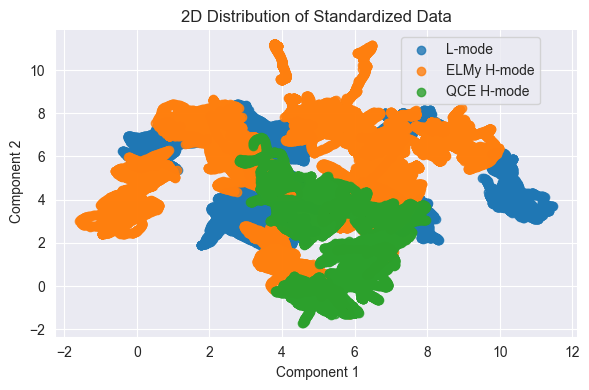

In [241]:
# Choose the top 2 principal components
X_pre_top2 = X_preprocessed[:, :2]

pre_df = pd.DataFrame(
    data=X_pre_top2, 
    columns=['TSNE1', 'TSNE2'])

# map target names to PCA features   
target_names = {
    1:'L-mode',
    2:'QCE H-mode', 
    3:'ELMy H-mode'
}
pre_df['LHD label'] = y
pre_df['LHD label'] = pre_df['LHD label'].map(target_names)

# Plot the 2D PCA Scatterplot
sns.lmplot(
    x='TSNE1', 
    y='TSNE2', 
    data=pre_df, 
    hue='LHD label', 
    fit_reg=False,
    legend=False,
    height=4, aspect=1.5 # width = height * aspect
    )
plt.title('2D Distribution of Standardized Data')
plt.xlabel(' Component 1')
plt.ylabel(' Component 2')
plt.tight_layout()
# Adjust legend outside the plot
plt.legend(bbox_to_anchor=(0.65, 1), loc='upper left')
#plt.legend()
plt.show()

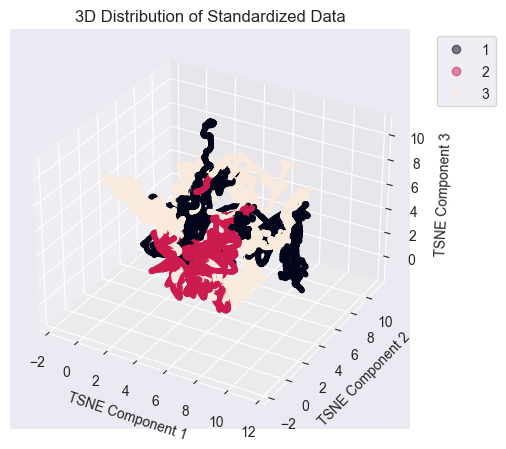

In [242]:
# axes instance
fig = plt.figure(figsize=(4,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sns.color_palette("Set2")

# plot
sc = ax.scatter(X_preprocessed[:,0], X_preprocessed[:,1], X_preprocessed[:,2], s=10, c=y, marker='o', alpha=0.5)

plt.title('3D Distribution of Standardized Data')
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_zlabel('TSNE Component 3')
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [243]:
df_data_analysis

,isbaffled,ip,b0,nel,ptot,pdiv,q95,betan,kappa,deltaavg,deltaupp,deltalow,gapin,gapout,zmag,rmag,rmin,lpar_ot,zeff,LHD_label
0,1.0,-168210.375150,-1.442735,3.756246e+19,175726.540319,0.013310,4.560044,0.732083,1.512640,0.515621,0.347320,0.683923,0.027576,0.034128,-0.019449,0.890963,0.224565,15.855245,1.555953,1.0
1,1.0,-168210.518232,-1.442727,3.756413e+19,175733.605740,0.013316,4.559926,0.732068,1.512626,0.515608,0.347289,0.683927,0.027578,0.034125,-0.019453,0.890966,0.224566,15.855202,1.555913,1.0
2,1.0,-168210.696677,-1.442719,3.756580e+19,175740.673362,0.013322,4.559809,0.732053,1.512611,0.515595,0.347258,0.683931,0.027579,0.034122,-0.019457,0.890968,0.224566,15.855159,1.555873,1.0
3,1.0,-168210.957823,-1.442711,3.756746e+19,175747.740983,0.013328,4.559691,0.732039,1.512597,0.515582,0.347228,0.683936,0.027581,0.034119,-0.019460,0.890970,0.224567,15.855115,1.555834,1.0
4,1.0,-168211.261618,-1.442703,3.756913e+19,175754.808605,0.013334,4.559573,0.732024,1.512582,0.515568,0.347197,0.683940,0.027583,0.034116,-0.019464,0.890973,0.224568,15.855072,1.555794,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55000,1.0,-167713.594533,-1.443107,4.556607e+19,217279.981722,0.008493,4.613632,0.777374,1.469062,0.451009,0.439850,0.462169,0.015396,0.021073,0.116649,0.898017,0.234723,16.906384,2.146465,1.0
55001,1.0,-167713.552248,-1.443095,4.557258e+19,217287.444621,0.008493,4.613673,0.777408,1.469070,0.451016,0.439863,0.462168,0.015396,0.021071,0.116651,0.898018,0.234723,16.906024,2.146503,1.0
55002,1.0,-167713.531173,-1.443082,4.557910e+19,217294.907520,0.008493,4.613714,0.777442,1.469078,0.451023,0.439877,0.462168,0.015396,0.021070,0.116652,0.898020,0.234724,16.905663,2.146540,1.0
55003,1.0,-167713.581324,-1.443069,4.558562e+19,217302.370419,0.008493,4.613755,0.777476,1.469086,0.451029,0.439891,0.462168,0.015397,0.021069,0.116654,0.898021,0.234725,16.905302,2.146578,1.0


In [244]:
pre_df['LHD label']

0        L-mode
1        L-mode
2        L-mode
3        L-mode
4        L-mode
          ...  
55000    L-mode
55001    L-mode
55002    L-mode
55003    L-mode
55004    L-mode
Name: LHD label, Length: 55005, dtype: object

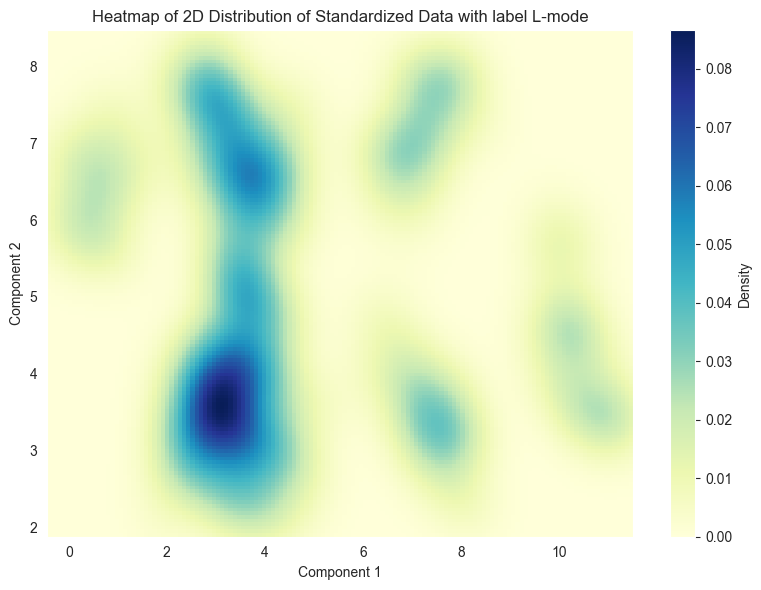

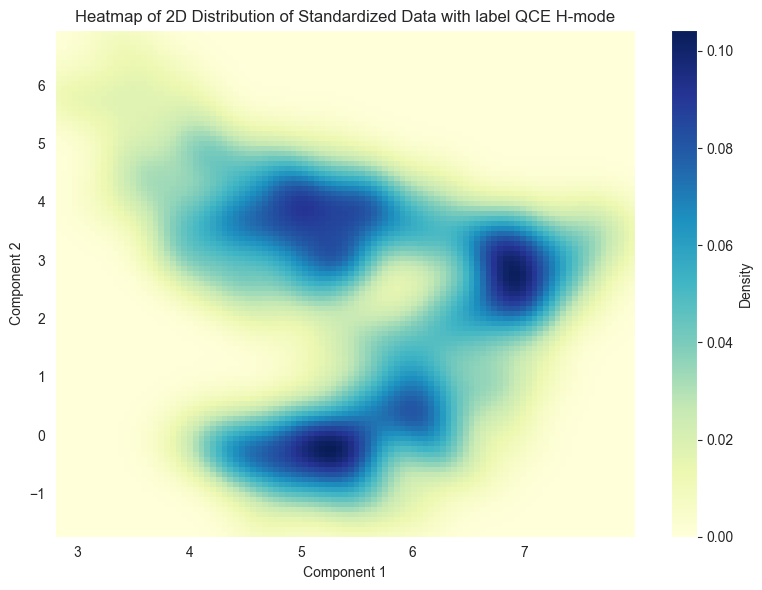

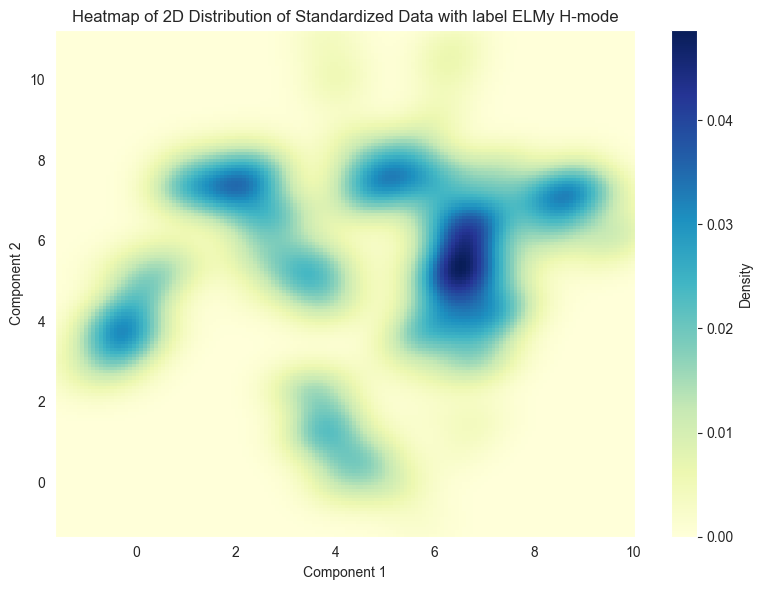

In [254]:
import numpy as np
import scipy.stats as sts
for label in target_names.values():
    pltx = (pre_df[pre_df['LHD label'] ==label ])['TSNE1']
    plty = (pre_df[pre_df['LHD label'] ==label ])['TSNE2']
    k = sts.gaussian_kde([pltx, plty])
    xi, yi = np.mgrid[pltx.min():pltx.max():pltx.size**0.5*1j, plty.min():plty.max():plty.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.YlGnBu)
    plt.colorbar(label='Density')
    plt.title(f'Heatmap of 2D Distribution of Standardized Data with label {label}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.tight_layout() 
    plt.show()


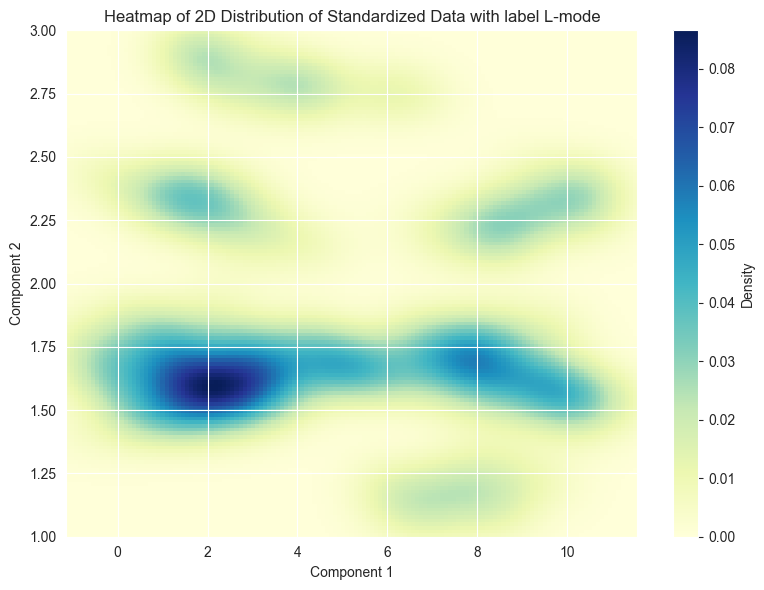

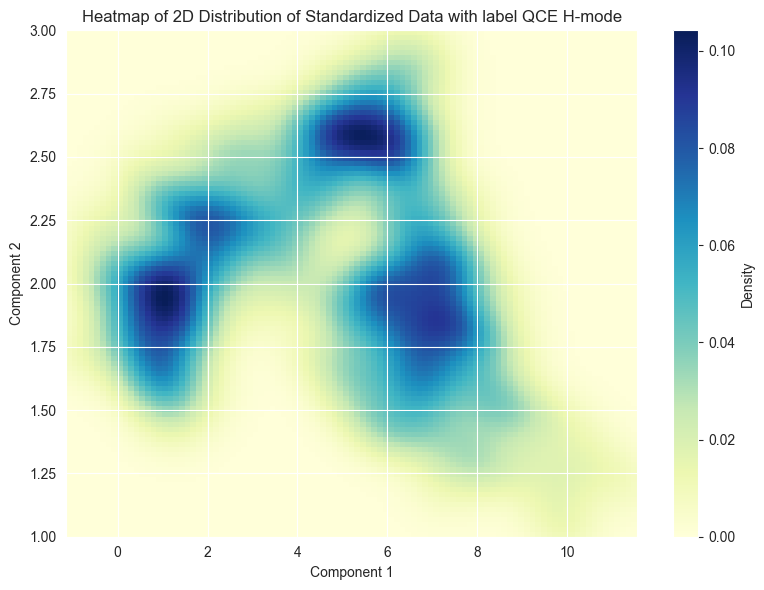

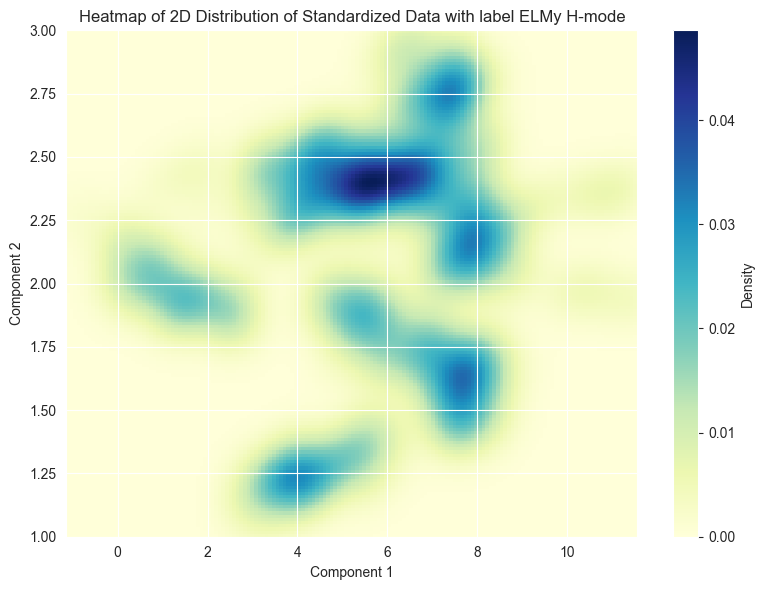

In [258]:
for label in target_names.values():
    pltx = pre_df[pre_df['LHD label'] == label]['TSNE1']
    plty = pre_df[pre_df['LHD label'] == label]['TSNE2']
    k = sts.gaussian_kde([pltx, plty])
    xi, yi = np.mgrid[pltx.min():pltx.max():pltx.size**0.5*1j, plty.min():plty.max():plty.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    plt.figure(figsize=(8, 6))
    plt.imshow(zi.reshape(xi.shape), origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap=plt.cm.YlGnBu, aspect='auto')
    plt.colorbar(label='Density')
    plt.title(f'Heatmap of 2D Distribution of Standardized Data with label {label}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.tight_layout()
    plt.show()